<a href="https://colab.research.google.com/github/aagar19/mylearning/blob/master/SLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 42kB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 512kB 56.4MB/s 
     |████████████████████████████████| 3.8MB 46.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=7364f68abd751f7391340bfbaa45f80c56e1eddfbc57354f0df601a8f390e986
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninsta

In [3]:
#import the required libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# encoding to 0 and 1 
from sklearn.utils import  shuffle
# shuffle 
from sklearn.model_selection import train_test_split


In [16]:
#function to read the sonar dataset
def read_dataset():
    df = pd.read_csv("sonar.csv")
    print(len(df.columns))
    X = df[df.columns[1:60]].values
    y=df[df.columns[60]]
    #encode the depedent variable, single it has more than one class
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    return(X,Y,y)

In [5]:
#normalise the features of the dataset
def feature_normalize(features):
    mu = np.mean(features,axis=0)
    sigma = np.std(features,axis=0)
    normalize_features = (features - mu) / sigma
    return(normalize_features)

In [18]:
#appending the bias
def append_bias_reshape(features):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    features = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim+1])
    return features

In [17]:
#define the one hot encode function
# 
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    # we are generating another column where R will become
    # 0 and M will become 1
    
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [8]:
#plot the graph for the data
def plot_points(features,labels):
    normal = np.where(labels == 0)
    outliers = np.where(labels == 1)
    fig = plt.figure(figsize=(10,8))
    plt.plot(features[normal ,0],features[normal ,1],'bx')
    plt.plot(features[outliers,0],features[outliers ,1],'ro')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)')
    plt.show()

61


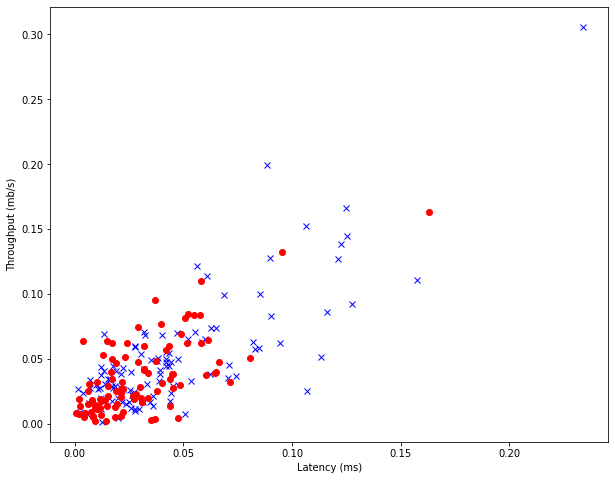

In [20]:

#read the data
X,Y,y = read_dataset() #X - Features , Y - Labels
normalized_featues = feature_normalize(X)
plot_points(X,y)

In [21]:
#Transform the data in training and testing
X,Y = shuffle(X,Y,random_state=1)
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.20, random_state=42)

#print the shape of the train and test data values
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(165, 59)
(165, 2)
(42, 59)
(42, 2)


In [22]:
#define and initialize the variables to work with the tensors
learning_rate = 0.1
training_epochs = 1000

cost_history = np.empty(shape=[1],dtype=float)

n_dim = X.shape[1]
n_class = 2

In [23]:
x = tf.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))

In [24]:
#initialize all variables.
init = tf.global_variables_initializer()

In [25]:
#define the cost function
y_ = tf.placeholder(tf.float32,[None,n_class])
y = tf.nn.softmax(tf.matmul(x, W)+ b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)),reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [26]:
#initialize the session
sess = tf.Session()
sess.run(init)
mse_history = []

epoch :  0  -  cost:  0.68906105
epoch :  1  -  cost:  0.6861654
epoch :  2  -  cost:  0.68367696
epoch :  3  -  cost:  0.6813537
epoch :  4  -  cost:  0.67911965
epoch :  5  -  cost:  0.67695
epoch :  6  -  cost:  0.67483526
epoch :  7  -  cost:  0.6727712
epoch :  8  -  cost:  0.670755
epoch :  9  -  cost:  0.6687846
epoch :  10  -  cost:  0.6668579
epoch :  11  -  cost:  0.6649732
epoch :  12  -  cost:  0.6631286
epoch :  13  -  cost:  0.66132265
epoch :  14  -  cost:  0.6595537
epoch :  15  -  cost:  0.6578204
epoch :  16  -  cost:  0.65612125
epoch :  17  -  cost:  0.6544549
epoch :  18  -  cost:  0.65282
epoch :  19  -  cost:  0.6512156
epoch :  20  -  cost:  0.6496404
epoch :  21  -  cost:  0.64809334
epoch :  22  -  cost:  0.6465734
epoch :  23  -  cost:  0.6450795
epoch :  24  -  cost:  0.6436109
epoch :  25  -  cost:  0.6421665
epoch :  26  -  cost:  0.6407456
epoch :  27  -  cost:  0.63934726
epoch :  28  -  cost:  0.6379708
epoch :  29  -  cost:  0.6366156
epoch :  30  -  c

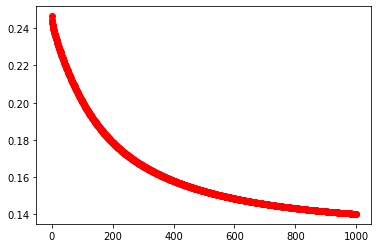

In [27]:
#calculate the cost for each epoch
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost = sess.run(cost_function,feed_dict={x: train_x,y_: train_y})
    cost_history = np.append(cost_history,cost)
    pred_y = sess.run(y, feed_dict={x: test_x})
    print('epoch : ', epoch,  ' - ', 'cost: ', cost)


    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_history.append(sess.run(mse))
    # MSE - testing 
    # Cost - Training 

#print the final mean square error
print("MSE:",mse_history)
plt.plot(mse_history, 'ro-')
plt.show()

In [28]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ",(sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

Accuracy:  0.8333333


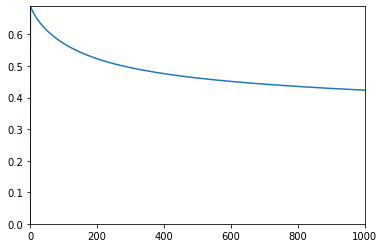

In [30]:

plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

it is not giving good result and good job. We did not reach global minima. 
No of epocs are 1000. 


1.   design can be changed.
2.   Cost is used for variant disrent.

Limitation of single perception:
one neuron, 60 inputs
Nobody uses single perception. Just need to understand.

Linear regression is better than single percepttron. idea is to get the single layer perceptron

We always uses multilayer perceptron:

Change the code:


For SLP - so many codes but for MLP we will use less code.

SUMMATION FUNCTION:

ACTIVATION FUNCTION:












